<a href="https://colab.research.google.com/github/mukesh199739/oxford-102-flowers/blob/master/oxford_102_flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
import pandas as pd

In [3]:
path = untar_data(URLs.FLOWERS)

In [5]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-102-flowers/train.txt'),
 PosixPath('/root/.fastai/data/oxford-102-flowers/valid.txt'),
 PosixPath('/root/.fastai/data/oxford-102-flowers/test.txt'),
 PosixPath('/root/.fastai/data/oxford-102-flowers/jpg')]

In [7]:
df = pd.DataFrame({"images":[],"labels":[]})
labelfiles =['train.txt','valid.txt','test.txt']
for labelfile in labelfiles:
  f = open(path/'{}'.format(labelfile))
  lines = f.readlines()
  images = []
  labels = []
  for line in lines:
    image,label = line[4:-1].split(" ")
    images.append(image)
    labels.append(label)

  df = pd.DataFrame({"images" : images , "labels" : labels})
df.head()



  


,images,labels
0,image_06977.jpg,34
1,image_00800.jpg,80
2,image_05038.jpg,58
3,image_06759.jpg,0
4,image_01133.jpg,45


In [0]:
data = ImageDataBunch.from_df(path, df = df, folder = "/jpg",ds_tfms=get_transforms(), size=224, bs=32).normalize(imagenet_stats)

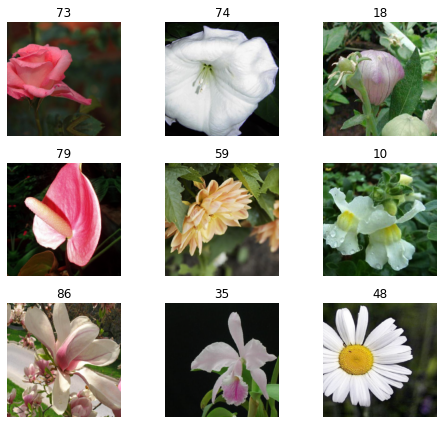

In [9]:
data.show_batch(rows=3, figsize=(7,6))

In [10]:
data.c

102

In [11]:
learn = cnn_learner(data,base_arch = models.resnet50,pretrained=True, metrics=[accuracy])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [13]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.608650,0.386017,0.894223,02:28
1,0.485448,0.282398,0.927583,02:33
2,0.270676,0.184892,0.951180,02:31
3,0.141511,0.173055,0.951180,02:30


In [0]:
learn.save("stage-1")

In [16]:
interp = ClassificationInterpretation.from_learner(learn)

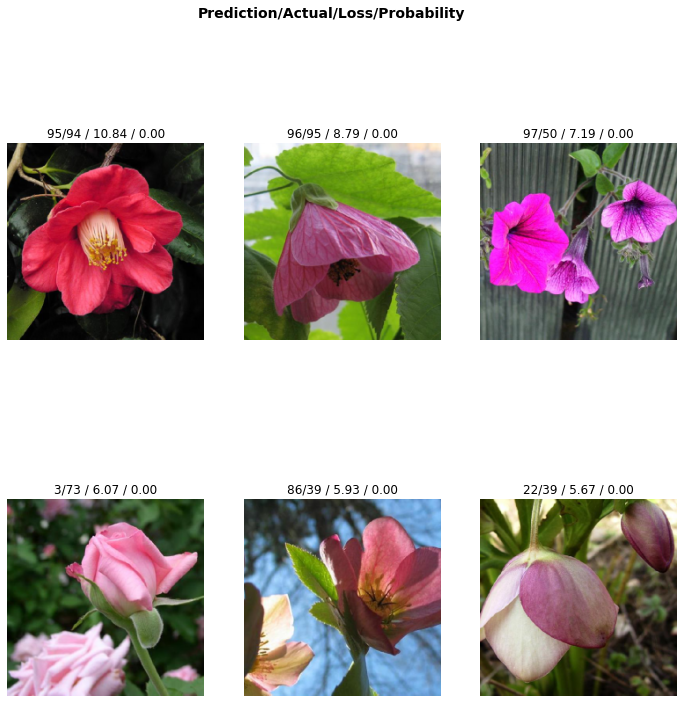

In [18]:
interp.plot_top_losses(6)

In [22]:
learn.load('stage-1')
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


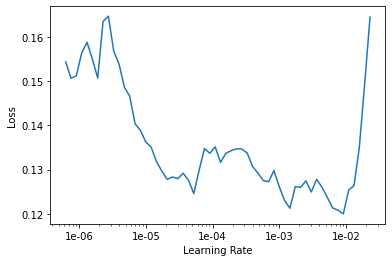

In [23]:
learn.recorder.plot()

In [25]:
learn.unfreeze()
learn.fit_one_cycle(1,max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.236844,0.203073,0.946298,02:32


In [26]:
learn.fit_one_cycle(1,max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.120846,0.168837,0.950366,02:26
